In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [37]:
df=pd.read_csv("/content/bird_migration_data.csv")

In [ ]:
df.head()

,Bird_ID,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality
0,B1000,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,...,Excellent,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low
1,B1001,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,...,Good,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low
2,B1002,Hawk,South America,Mountain,Stormy,Avoid Predators,87.861164,-78.727327,66.990980,19.448466,...,Fair,No,Lost Signal,Researcher_B,16.1,Failed,No,41,71,High
3,B1003,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,...,Good,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low
4,B1004,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,...,Good,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate


In [ ]:
df.shape

(10000, 41)

#**EDA(Explotary Data Analysis):-**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bird_ID                  10000 non-null  object 
 1   Species                  10000 non-null  object 
 2   Region                   10000 non-null  object 
 3   Habitat                  10000 non-null  object 
 4   Weather_Condition        10000 non-null  object 
 5   Migration_Reason         10000 non-null  object 
 6   Start_Latitude           10000 non-null  float64
 7   Start_Longitude          10000 non-null  float64
 8   End_Latitude             10000 non-null  float64
 9   End_Longitude            10000 non-null  float64
 10  Flight_Distance_km       10000 non-null  float64
 11  Flight_Duration_hours    10000 non-null  float64
 12  Average_Speed_kmph       10000 non-null  float64
 13  Max_Altitude_m           10000 non-null  int64  
 14  Min_Altitude_m         

In [ ]:
df.describe()

,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Max_Altitude_m,Min_Altitude_m,Temperature_C,...,Pressure_hPa,Visibility_km,Tag_Battery_Level_%,Signal_Strength_dB,Rest_Stops,Predator_Sightings,Flock_Size,Tag_Weight_g,Recovery_Time_days,Observation_Counts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.321812,-0.394588,0.084391,0.467617,2504.036134,49.994020,49.953394,5504.80830,500.111800,12.566930,...,1000.440810,10.636970,54.651800,-69.8408,7.380000,4.490200,248.714500,17.605870,60.490800,49.872800
std,51.919190,104.083440,51.709437,103.438134,499.723298,10.026108,5.085296,2595.28577,229.782907,13.073405,...,28.959614,5.504623,25.839271,9.9189,4.023583,2.872826,144.943771,7.200088,34.434028,28.601997
min,-89.999003,-179.993975,-89.998482,-179.902756,527.700000,12.600000,30.430000,1000.00000,100.000000,-10.000000,...,950.000000,1.000000,10.000000,-107.9000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000
25%,-45.390697,-91.444680,-43.664719,-88.871564,2169.632500,43.200000,46.530000,3277.75000,300.000000,1.200000,...,975.000000,5.900000,32.000000,-76.6000,4.000000,2.000000,124.000000,11.400000,31.000000,25.000000
50%,-0.138849,-0.479892,-0.163116,1.280823,2511.150000,50.050000,50.040000,5521.00000,501.000000,12.500000,...,1000.950000,10.700000,55.000000,-69.8000,7.000000,5.000000,248.000000,17.700000,61.000000,50.000000
75%,44.480926,89.640253,44.957102,91.196076,2841.452500,56.800000,53.360000,7740.25000,698.000000,24.000000,...,1025.500000,15.400000,77.000000,-63.1000,11.000000,7.000000,376.000000,24.000000,91.000000,74.000000
max,89.980302,179.989973,89.989145,179.955036,4428.320000,91.000000,68.950000,9999.00000,899.000000,35.000000,...,1050.000000,20.000000,99.000000,-33.3000,14.000000,9.000000,499.000000,30.000000,119.000000,99.000000


In [38]:
#Check the null values
df.isnull().sum()

,0
Bird_ID,0
Species,0
Region,0
Habitat,0
Weather_Condition,0
Migration_Reason,0
Start_Latitude,0
Start_Longitude,0
End_Latitude,0
End_Longitude,0


In [ ]:
df['Interrupted_Reason'].value_counts()

,count
Interrupted_Reason,
Storm,2059
Injury,2023
Predator,1994
Lost Signal,1943


In [32]:
#some of the null values present in Interrupted_Reason replace with no reason
df['Interrupted_Reason'].fillna('No Reason',inplace=True)

In [ ]:
#check the duplicated
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Bird_ID,object
Species,object
Region,object
Habitat,object
Weather_Condition,object
Migration_Reason,object
Start_Latitude,float64
Start_Longitude,float64
End_Latitude,float64
End_Longitude,float64


In [39]:
#drop the bird_id
df.drop('Bird_ID',axis=1,inplace=True)

In [ ]:
#check all categorical column
cat_column=df.select_dtypes(include='object').columns
cat_column

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Nesting_Success', 'Migration_Start_Month', 'Migration_End_Month',
       'Tag_Type', 'Migrated_in_Flock', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tagged_By', 'Migration_Success', 'Recovery_Location_Known',
       'Observation_Quality'],
      dtype='object')

In [ ]:
#Numerical column list
num_column=df.select_dtypes(exclude='object').columns
num_column

Index(['Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Tag_Battery_Level_%',
       'Signal_Strength_dB', 'Rest_Stops', 'Predator_Sightings', 'Flock_Size',
       'Tag_Weight_g', 'Recovery_Time_days', 'Observation_Counts'],
      dtype='object')

#***Data visualizations:-***

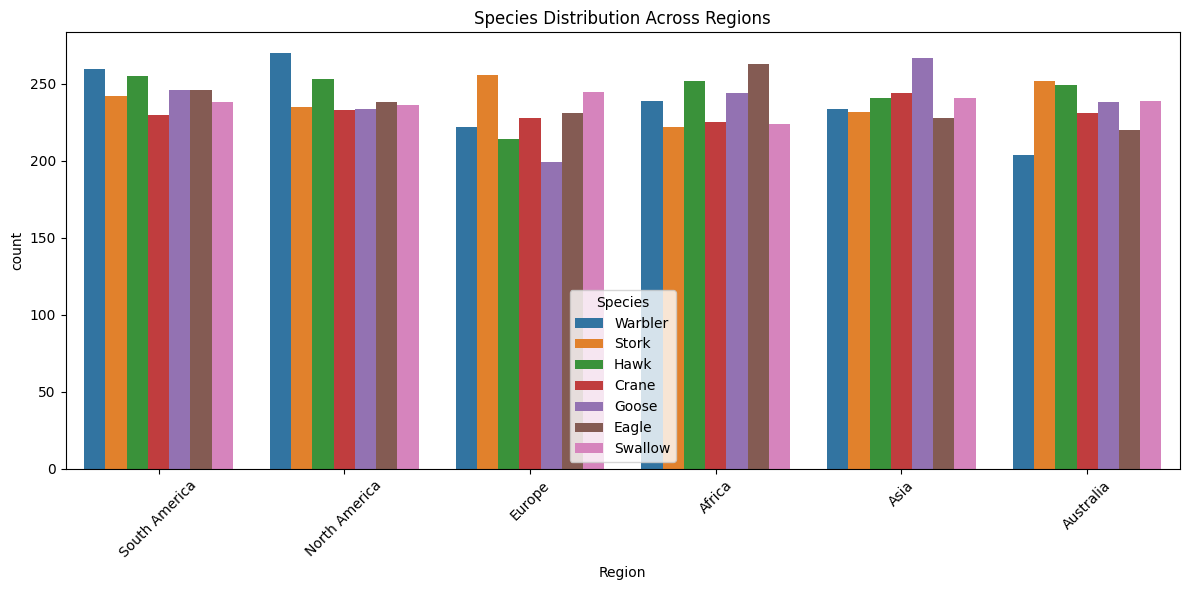

In [ ]:
#dataset visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Species')
plt.title('Species Distribution Across Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

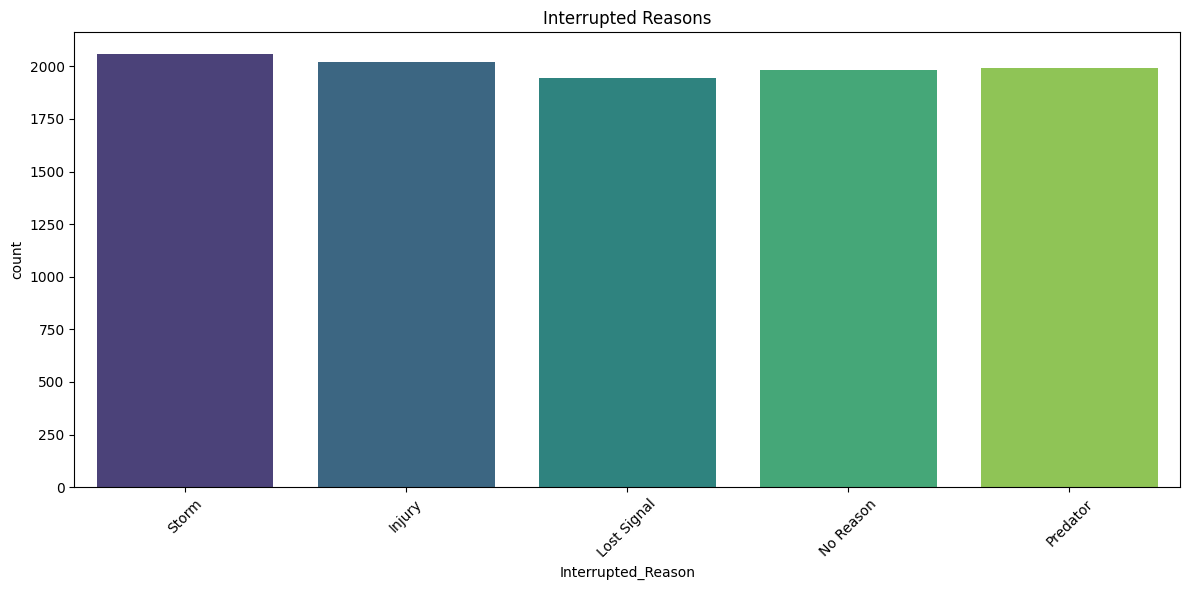

In [ ]:
#data visualization the 'Interrupted_Reason'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Interrupted_Reason',palette='viridis')
plt.title('Interrupted Reasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

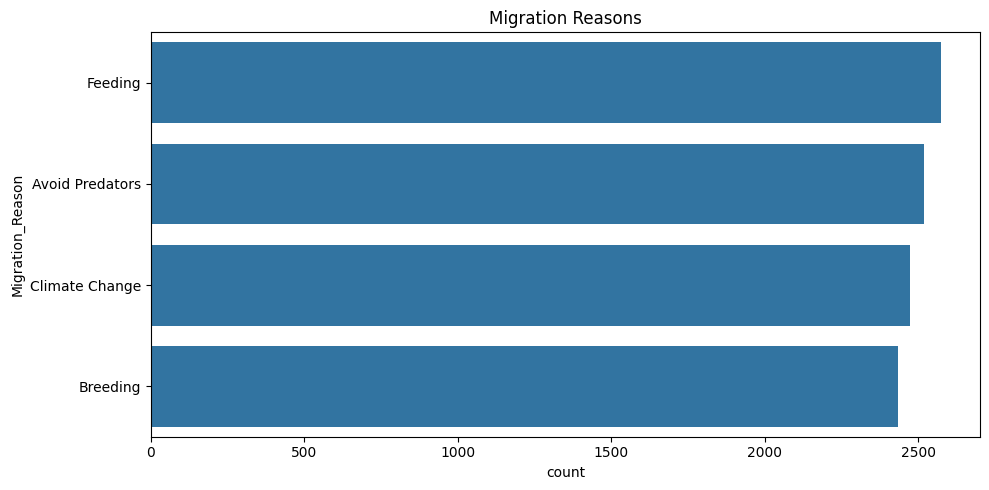

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Migration_Reason', order=df['Migration_Reason'].value_counts().index)
plt.title("Migration Reasons")
plt.tight_layout()
plt.show()

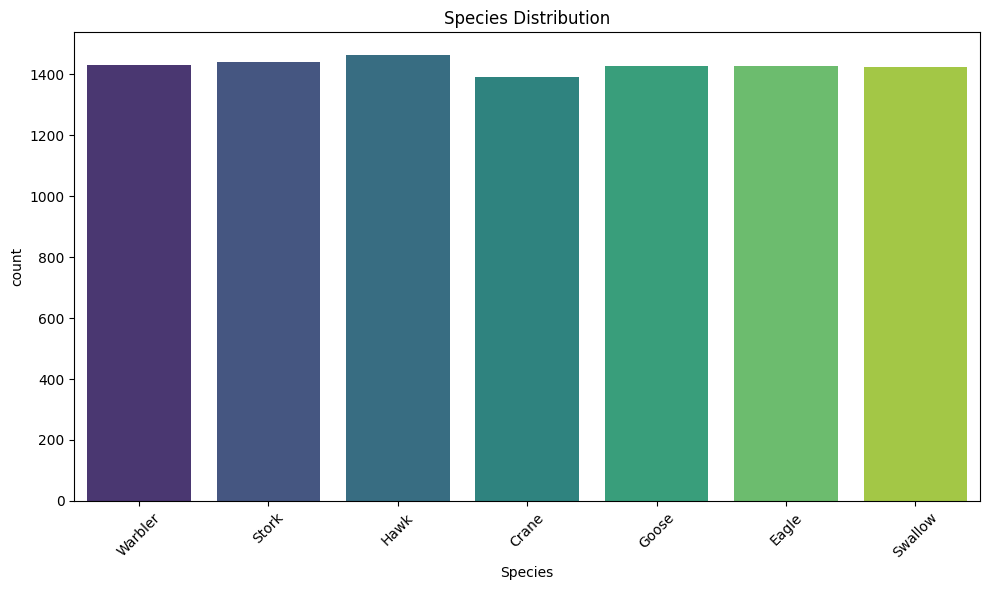

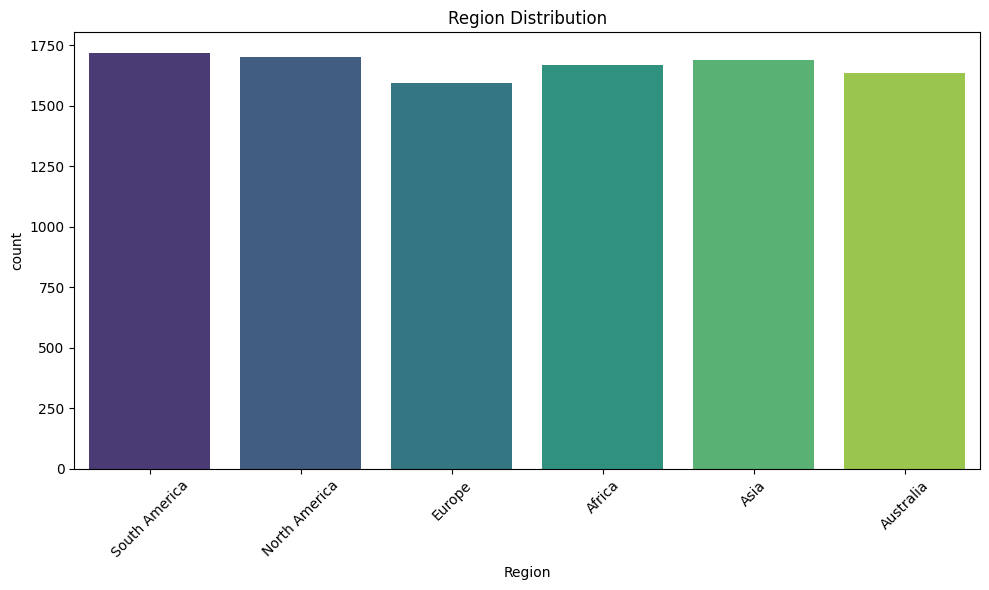

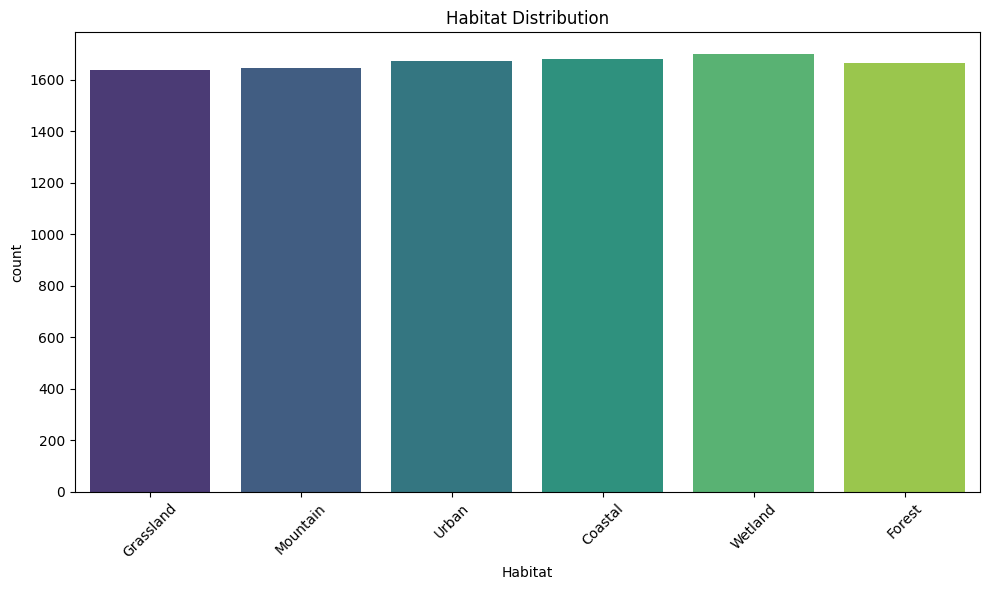

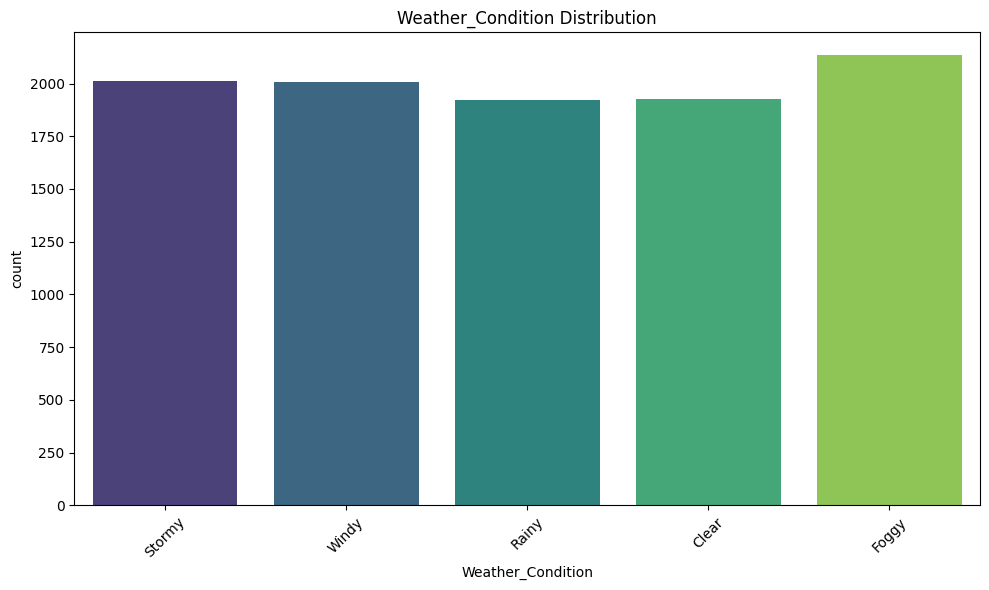

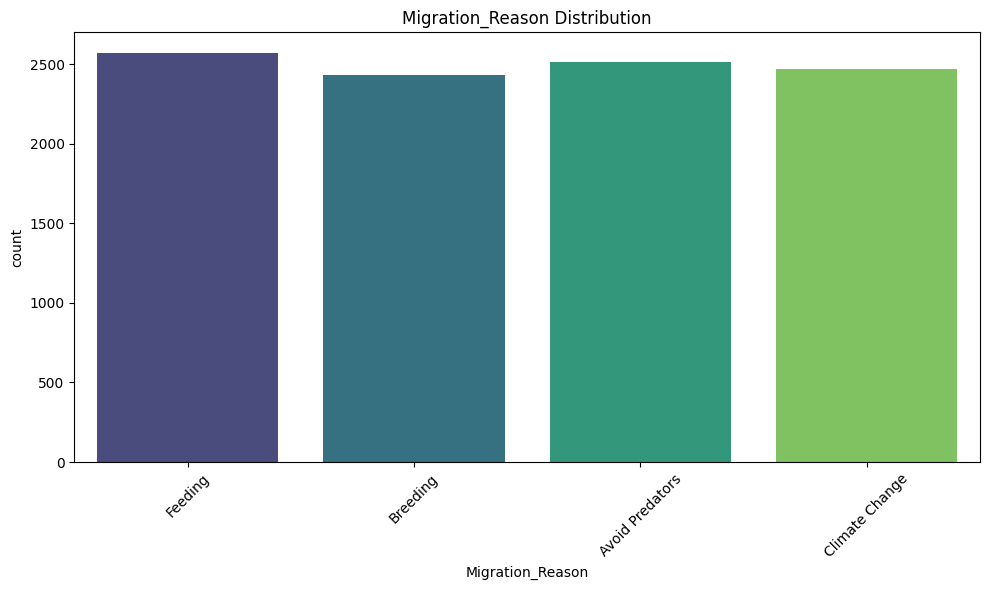

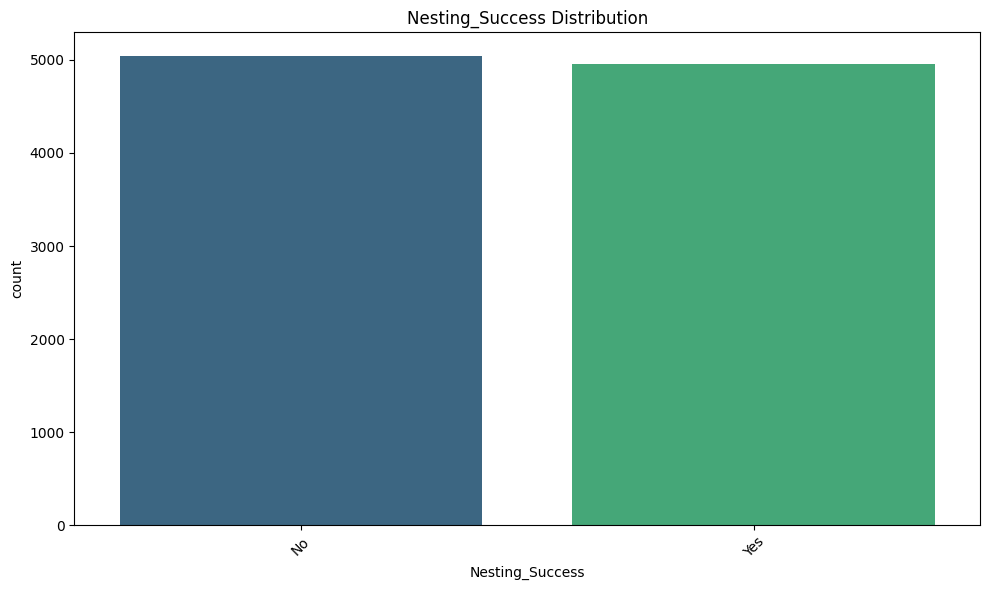

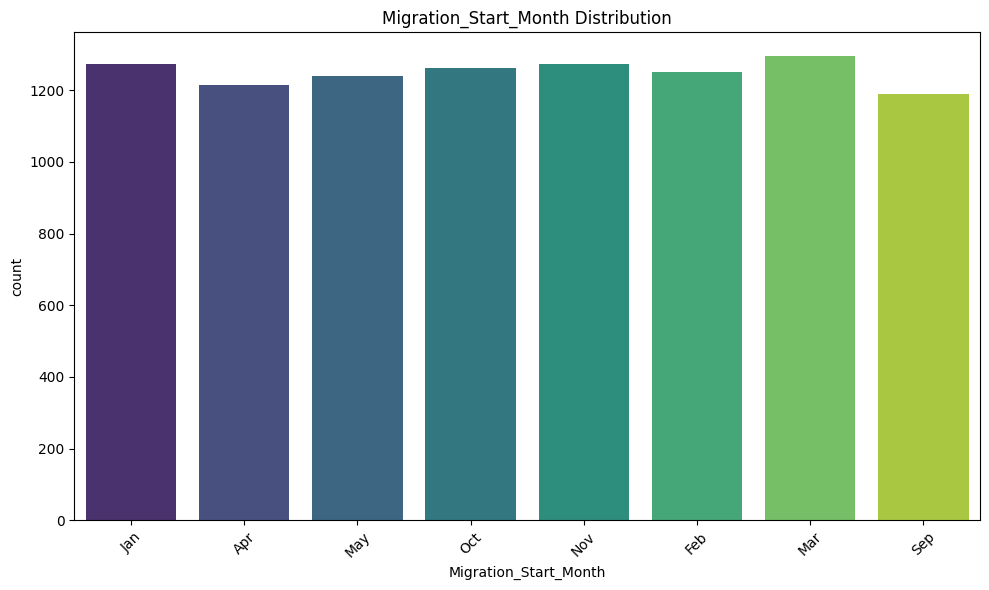

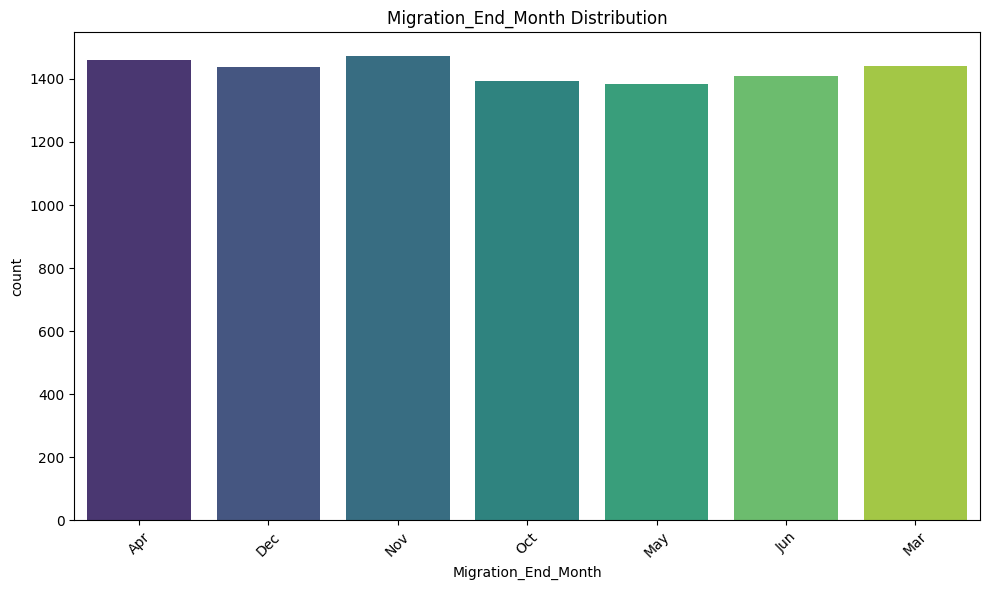

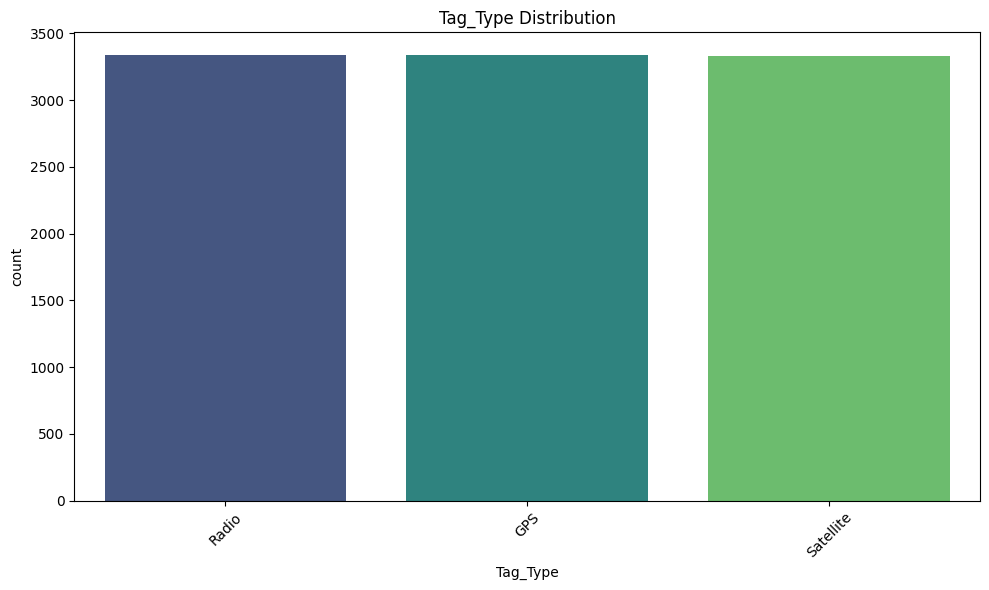

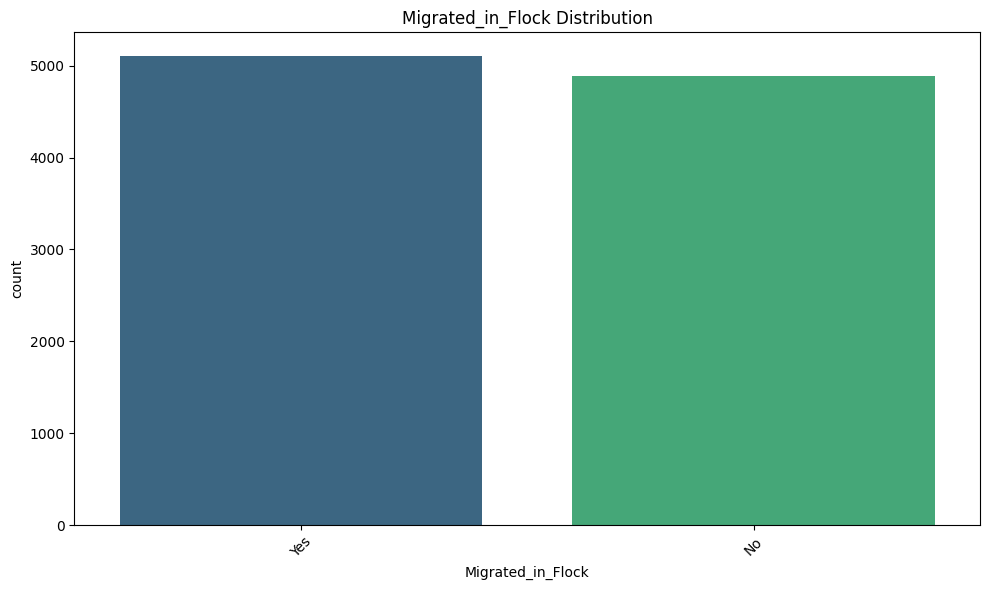

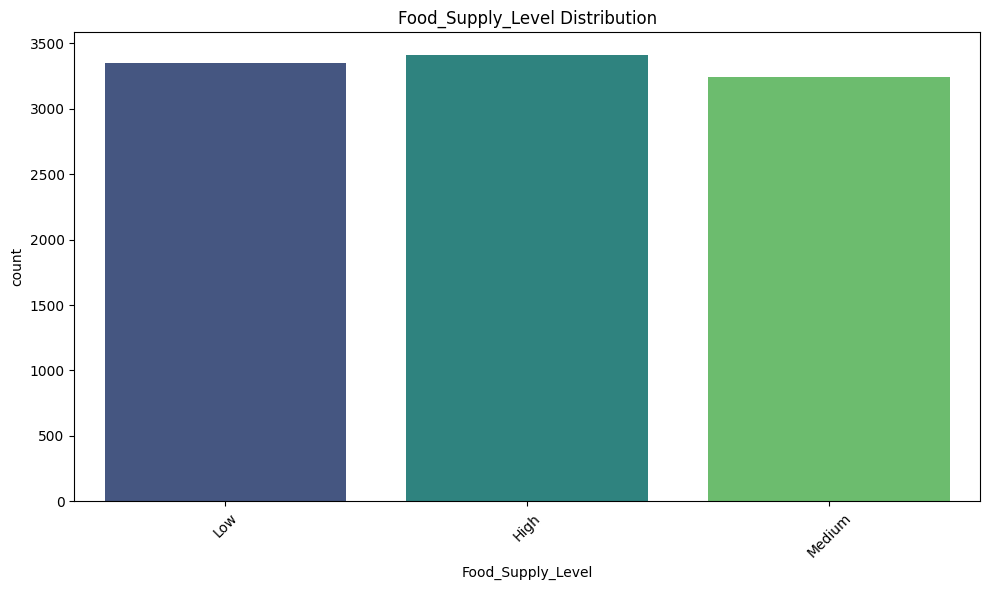

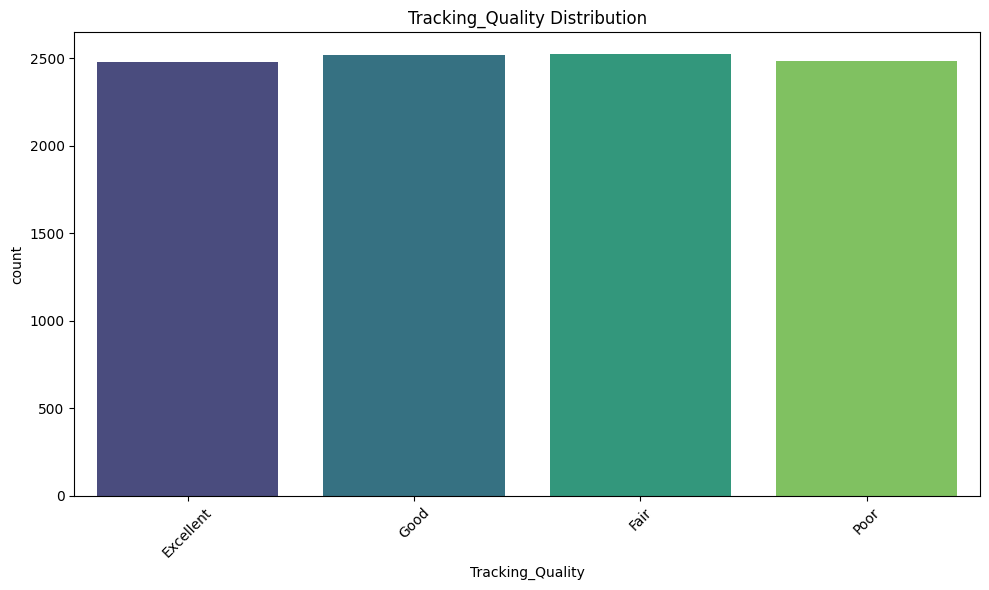

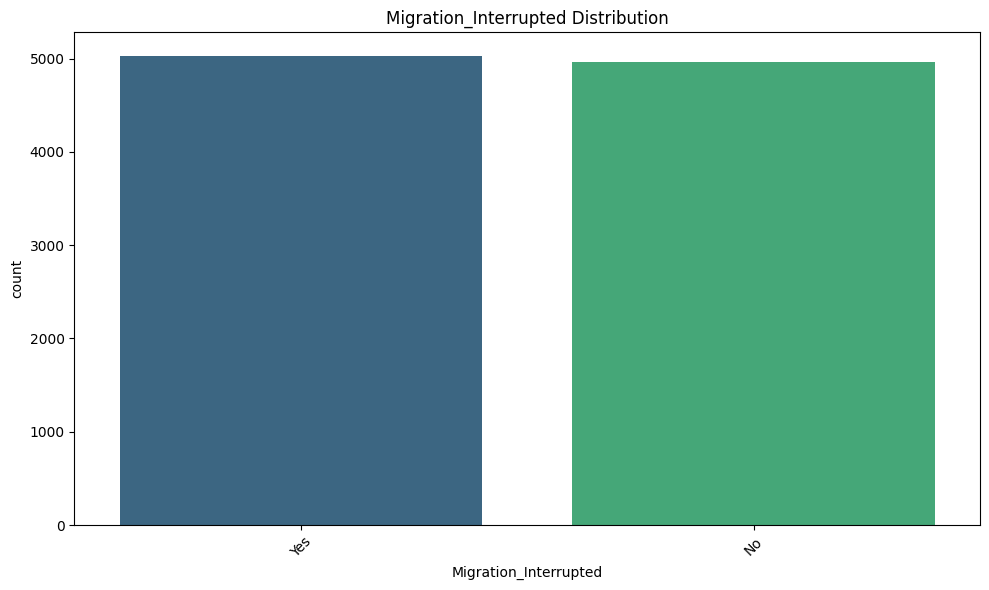

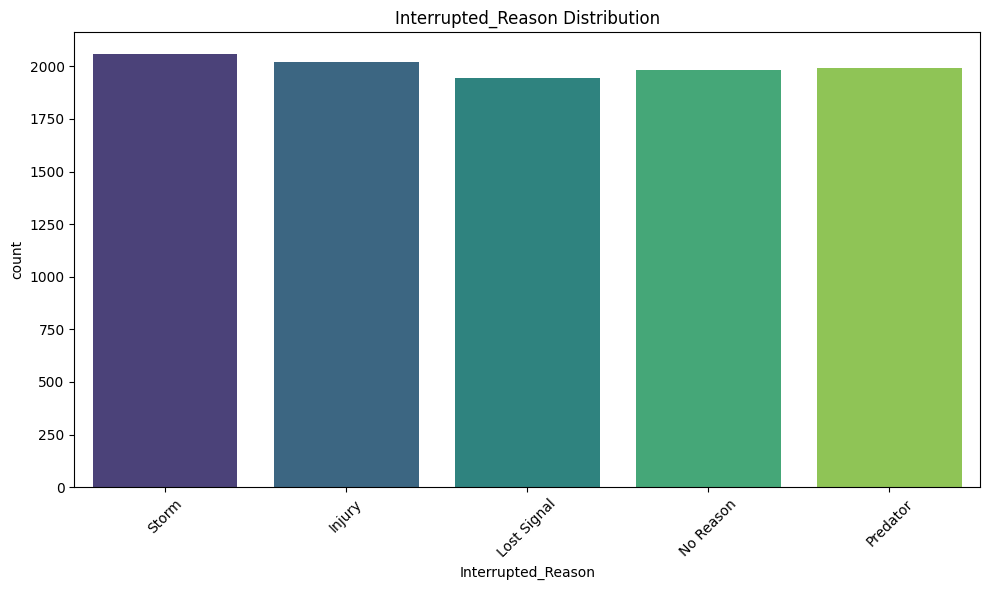

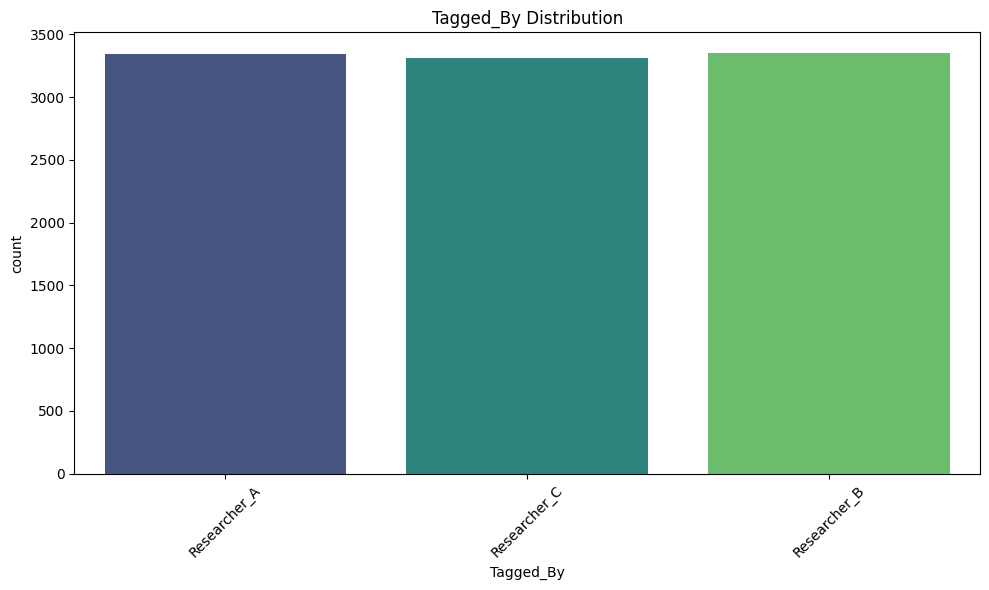

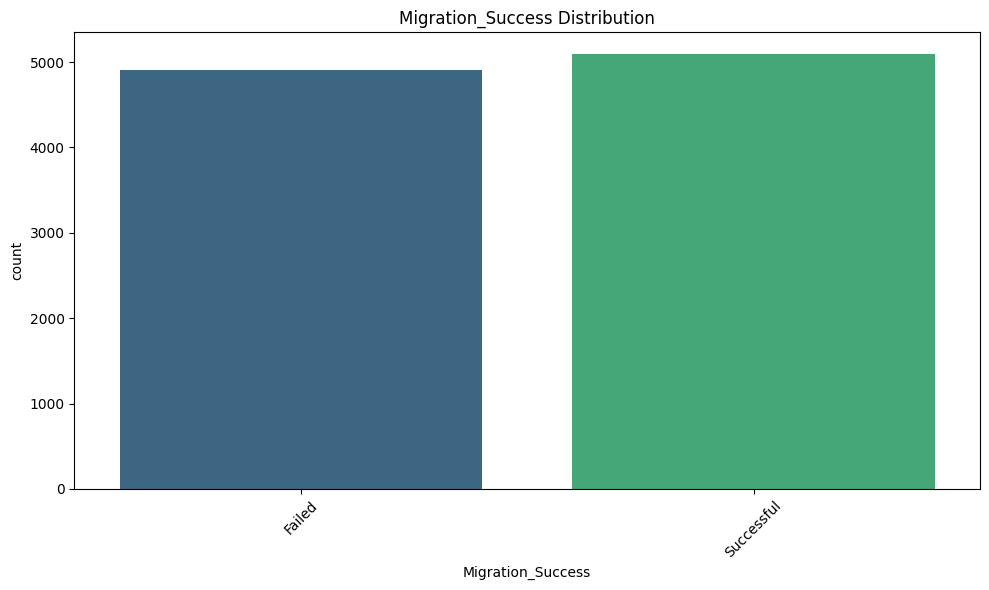

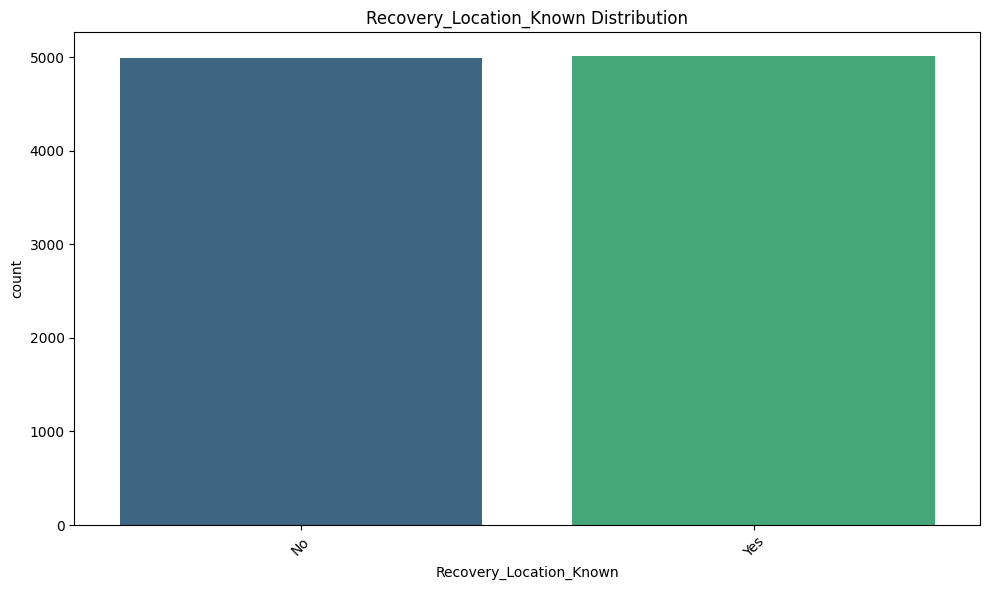

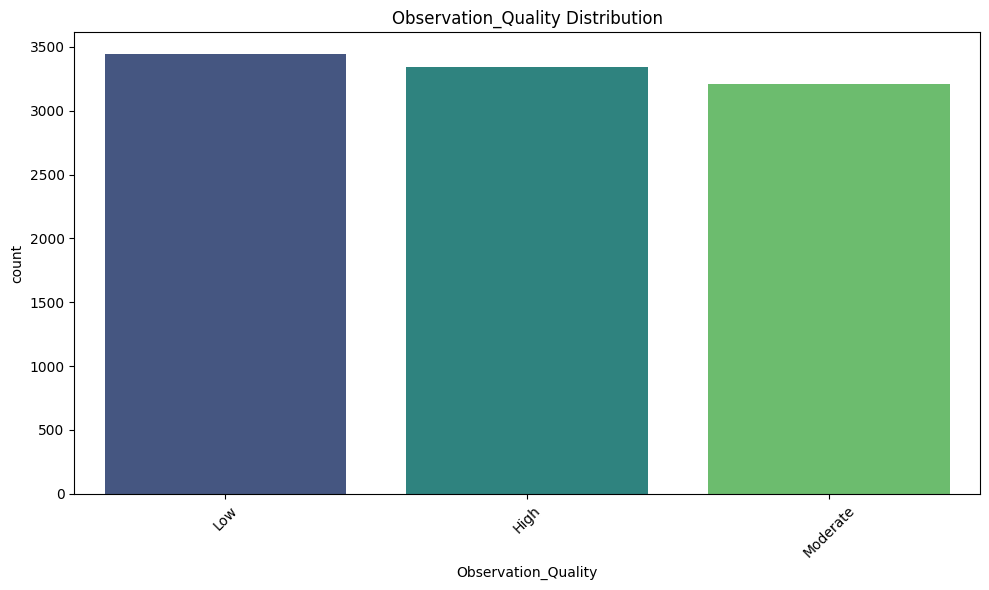

In [ ]:
#data  visualization of all categorical column
for i in cat_column:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x=i,palette='viridis')
  plt.title(f'{i} Distribution')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

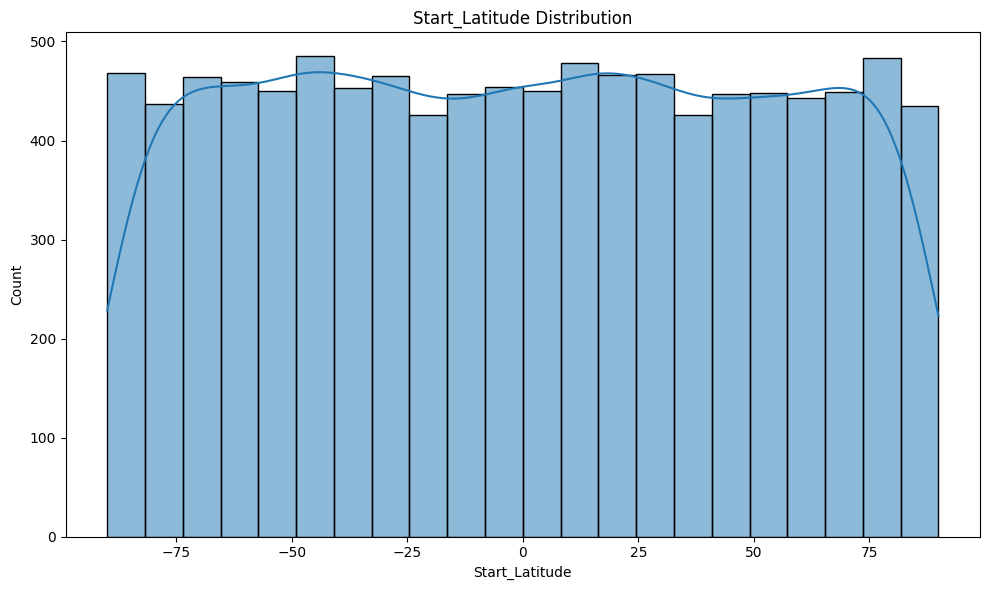

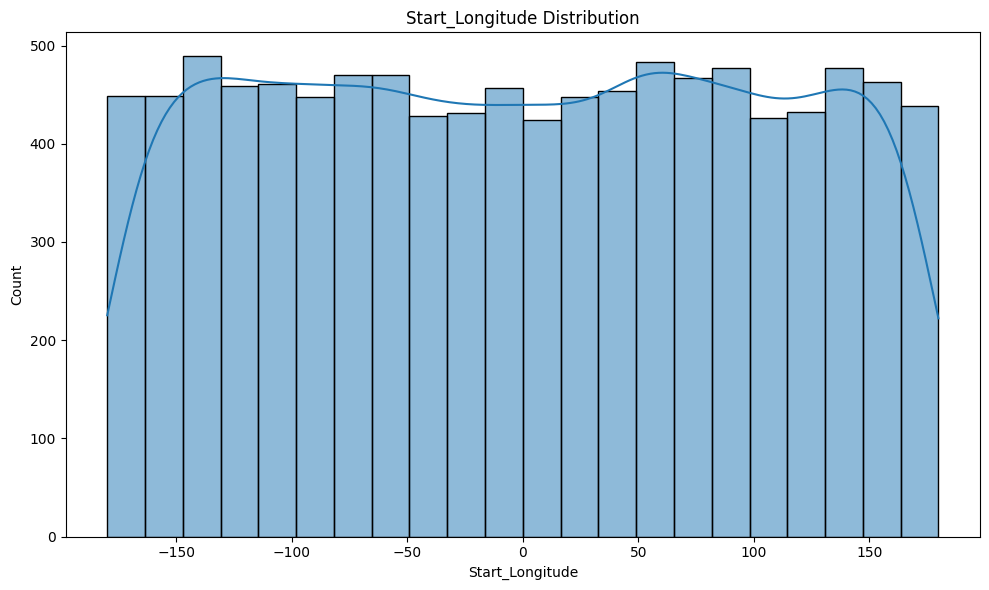

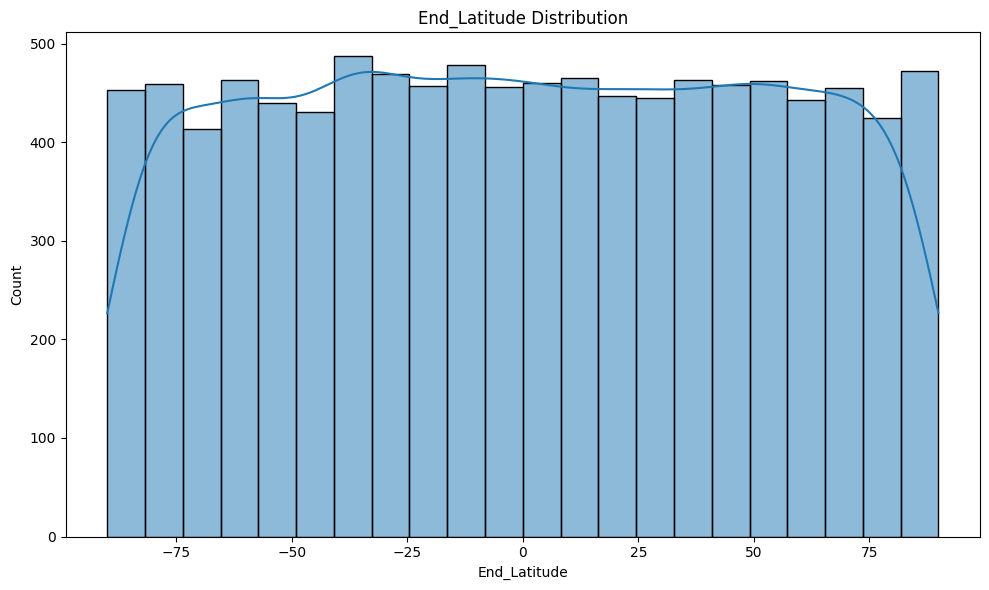

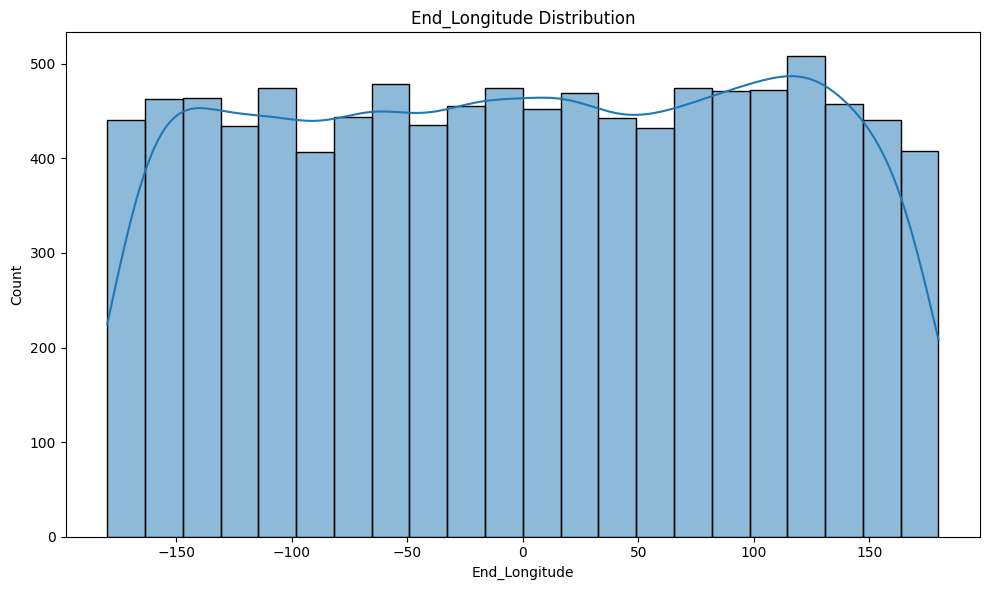

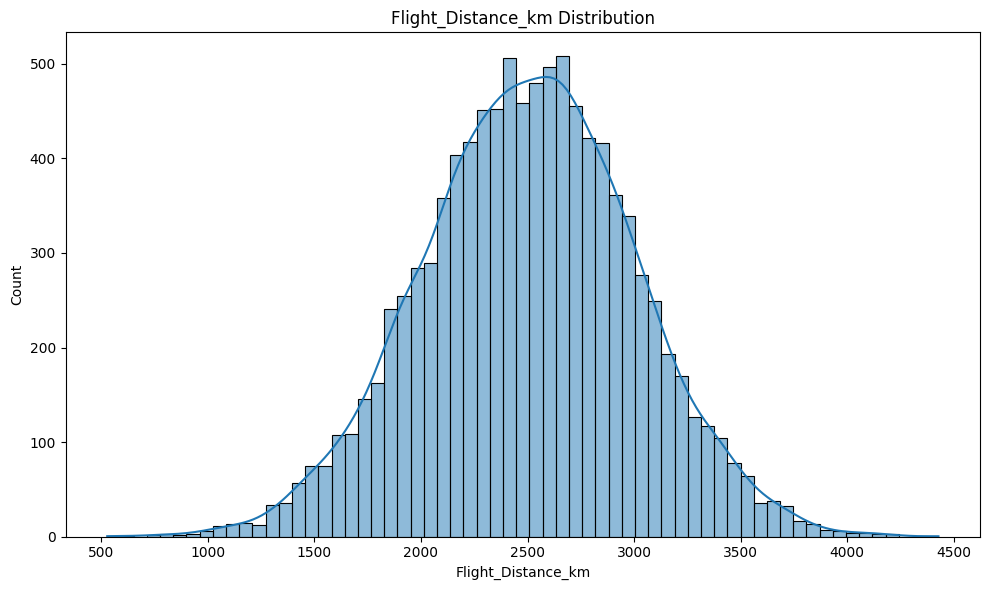

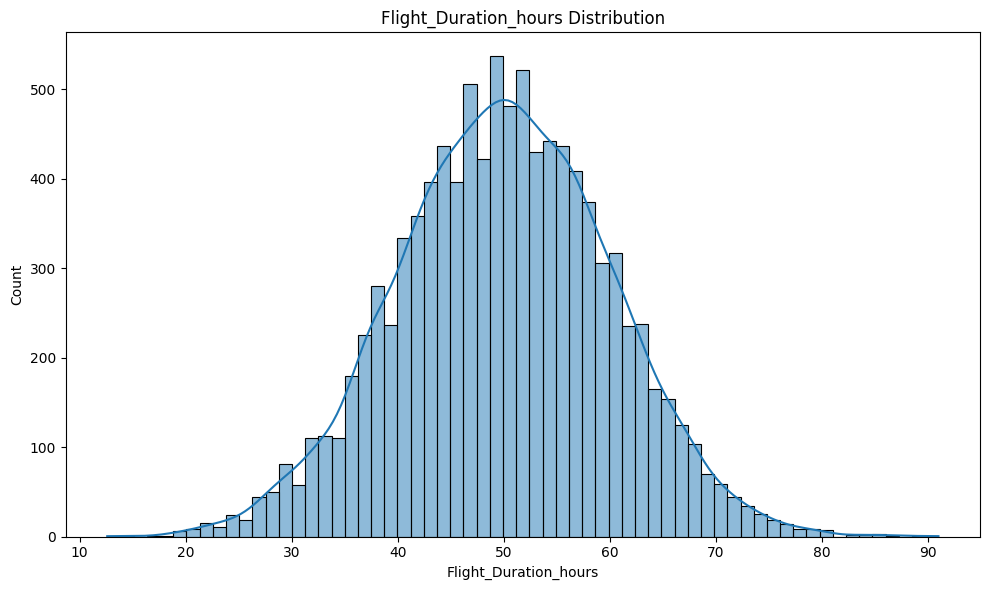

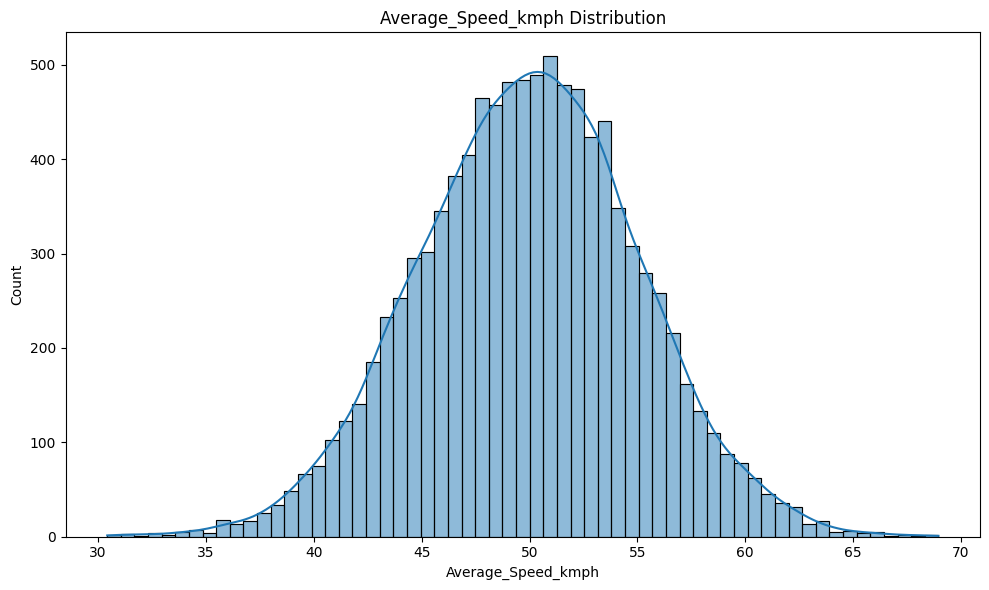

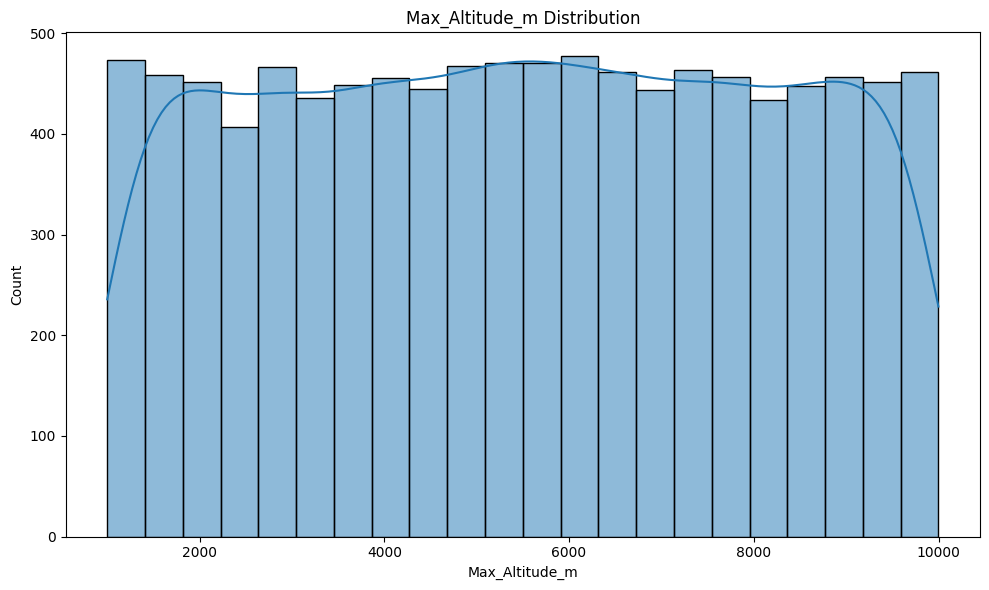

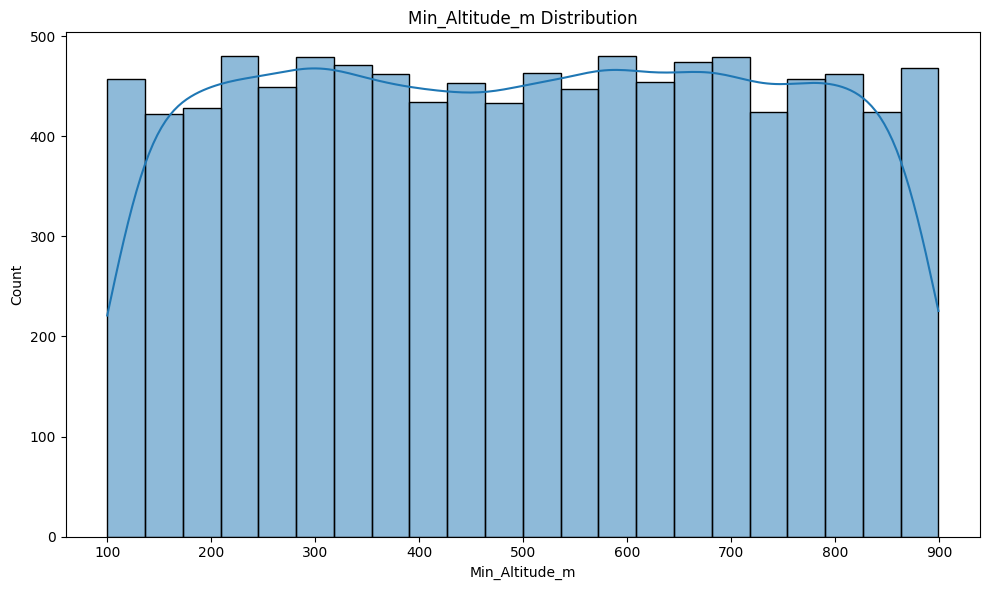

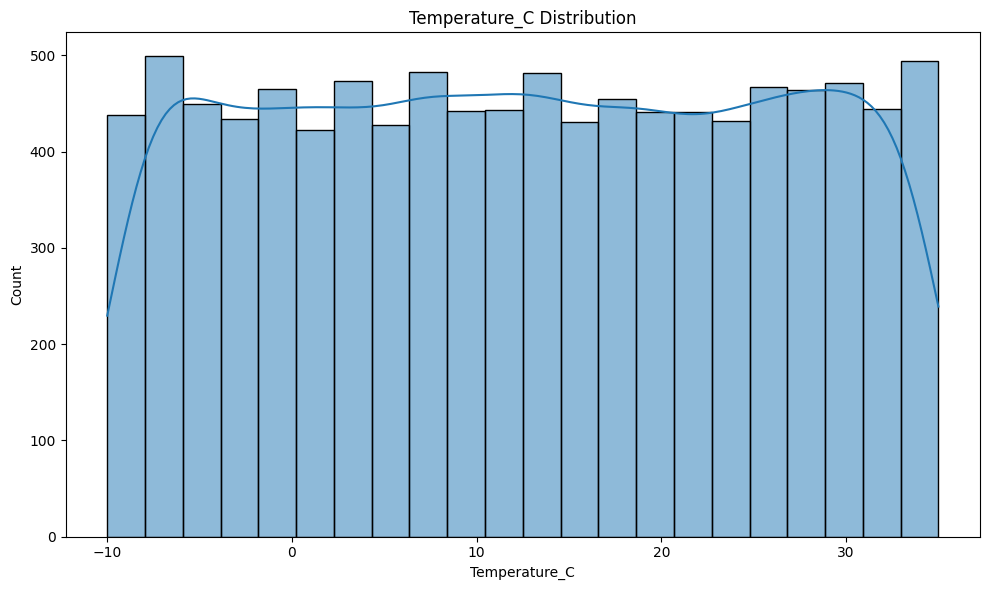

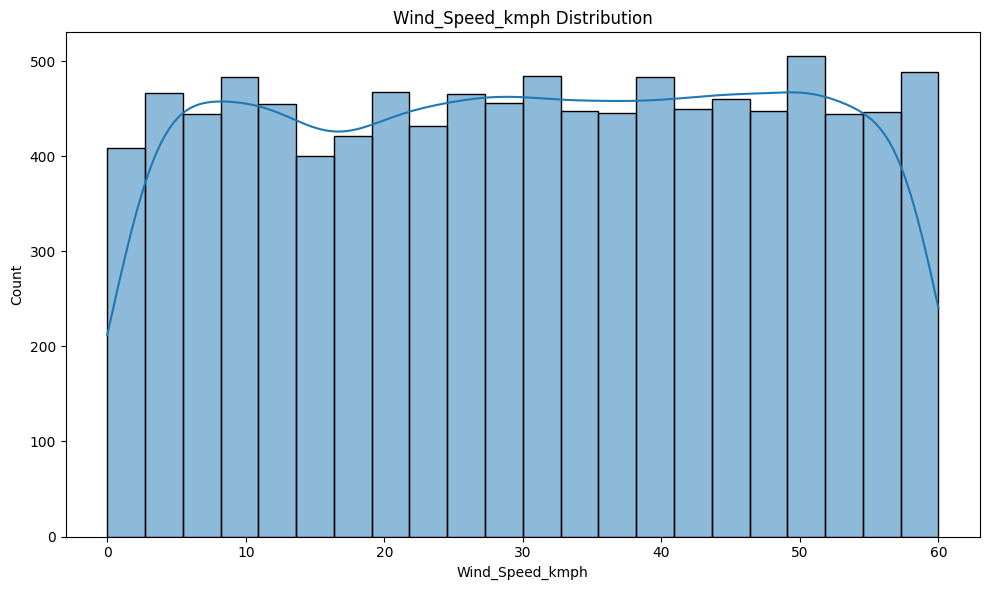

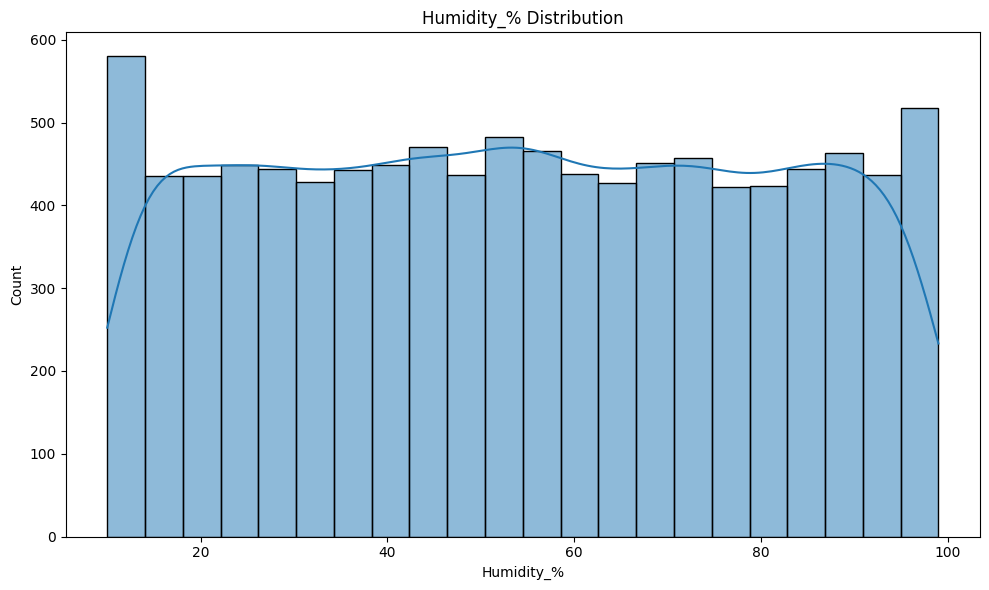

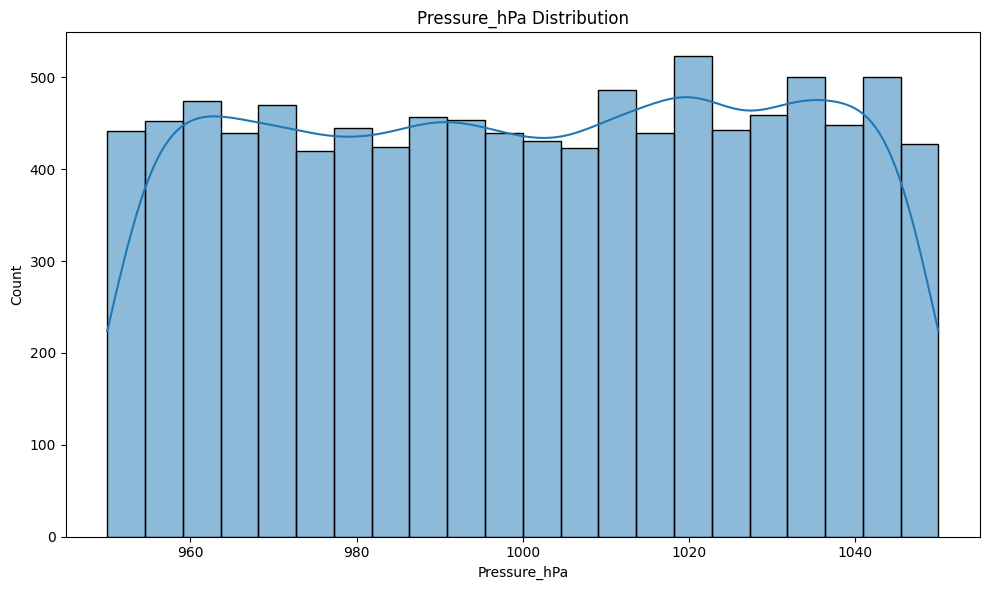

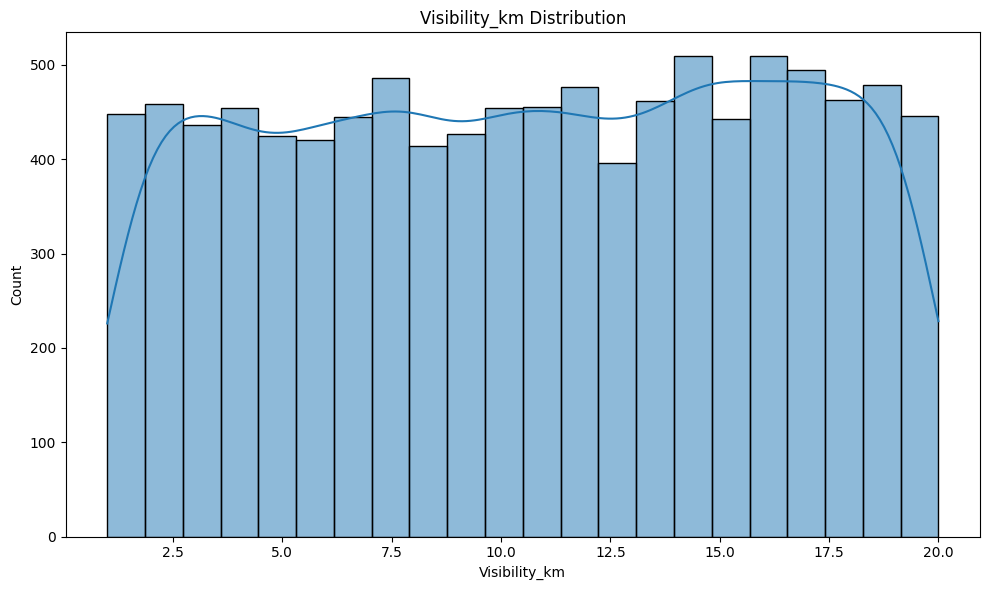

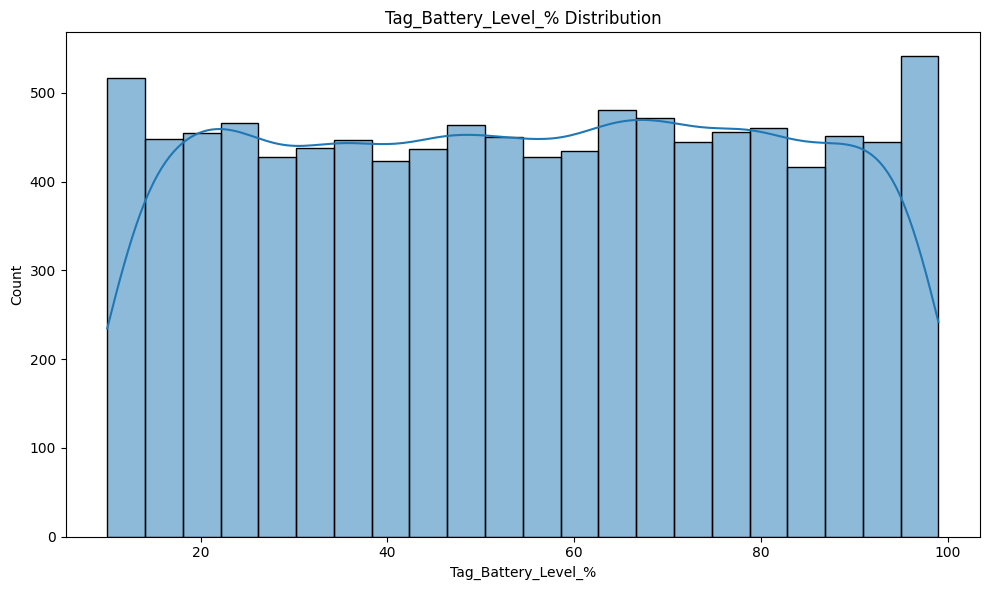

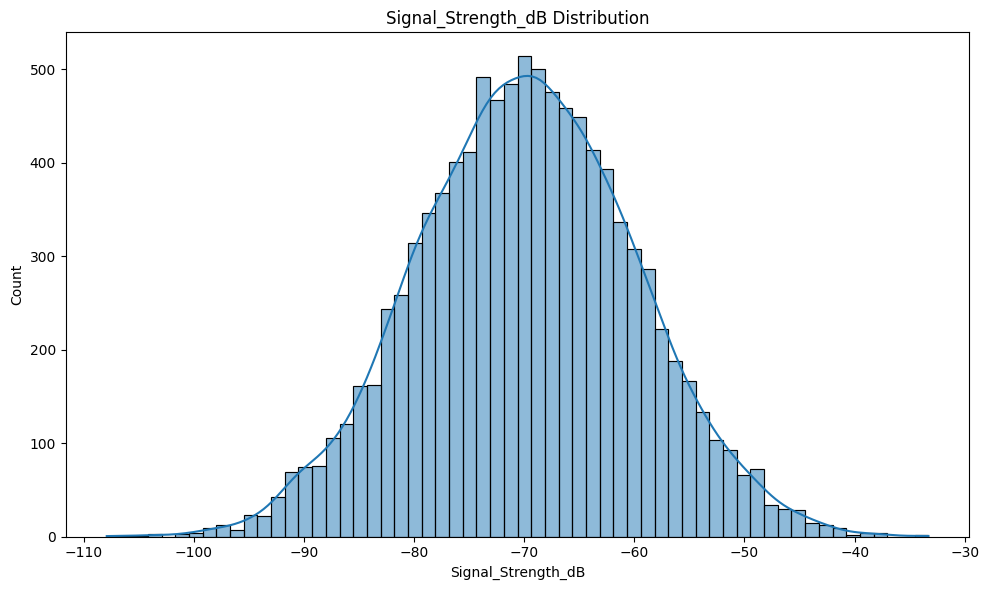

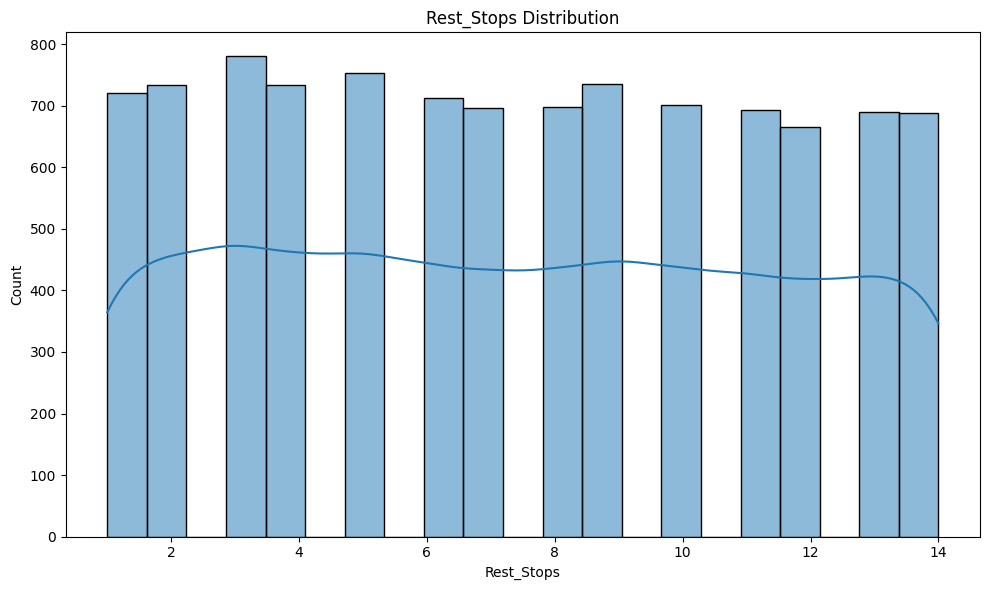

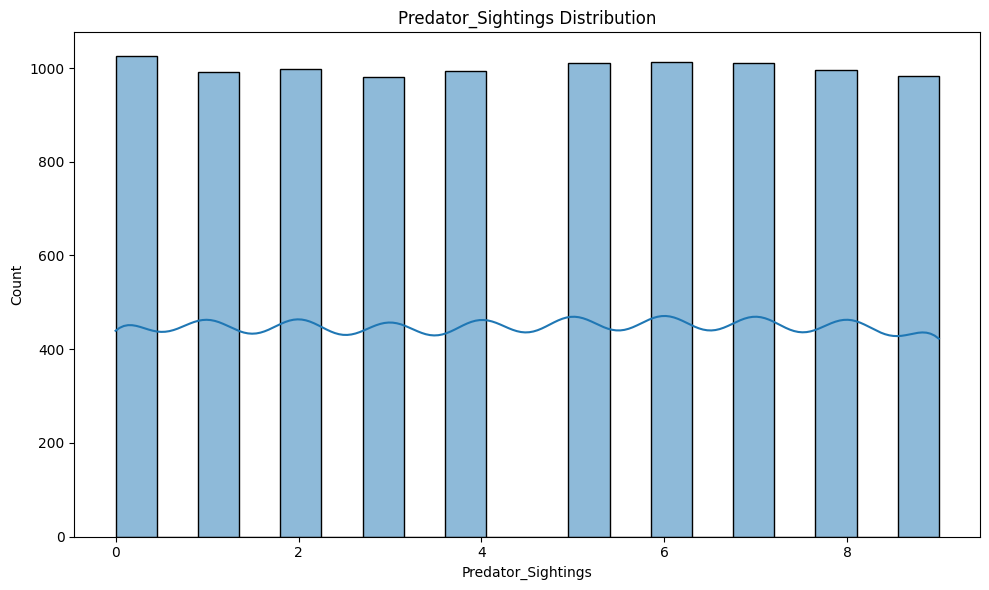

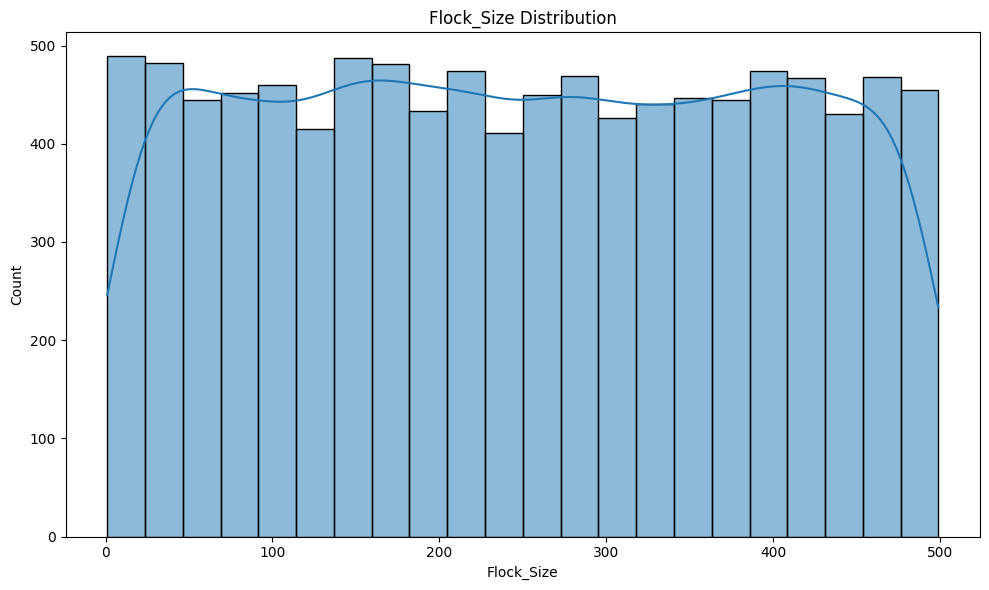

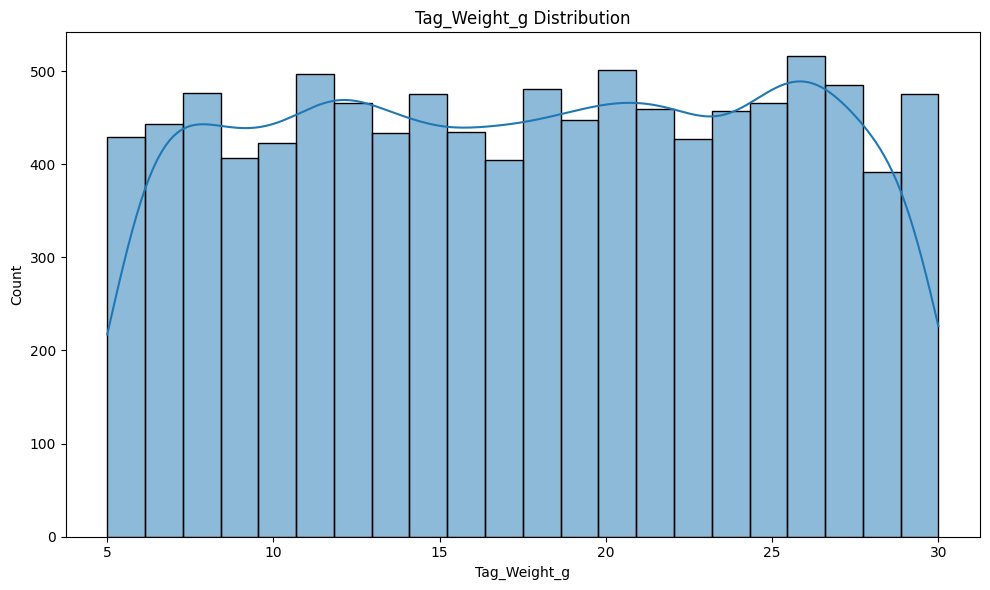

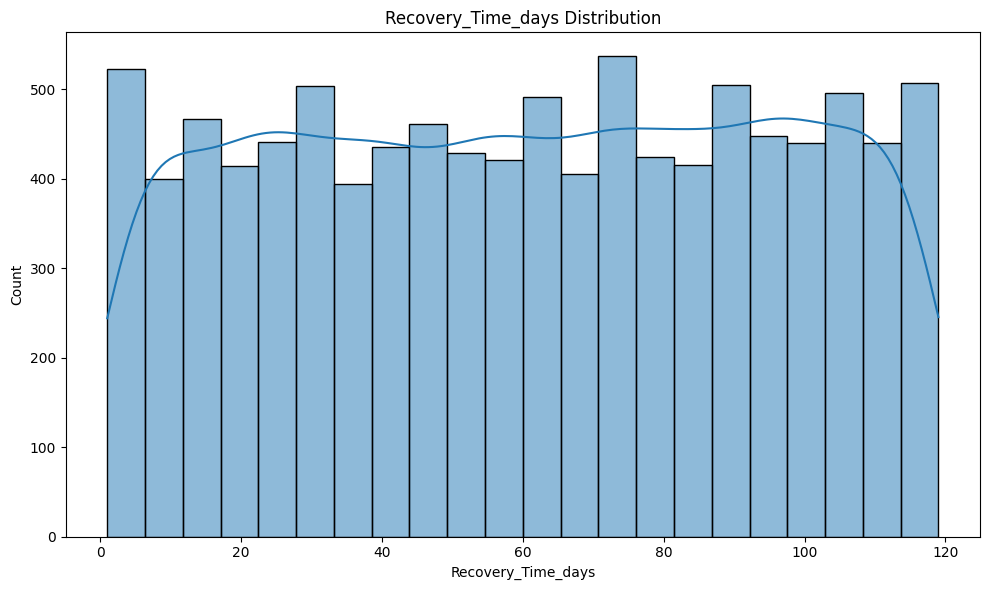

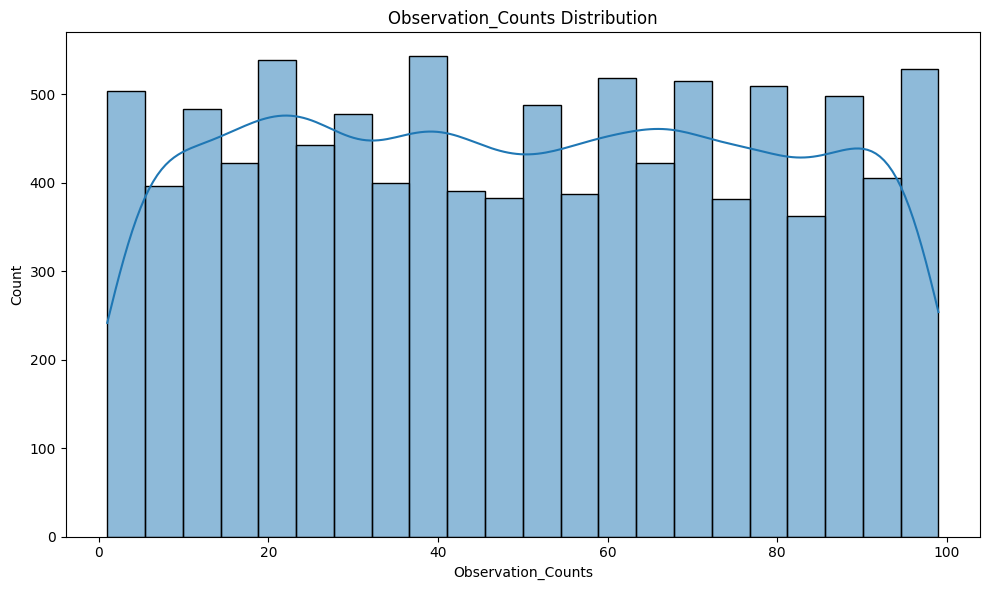

In [ ]:
#Numerical column distribution column visualization
for i in num_column:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x=i, kde=True,palette='viridis')
  plt.title(f'{i} Distribution')
  plt.tight_layout()
  plt.show()

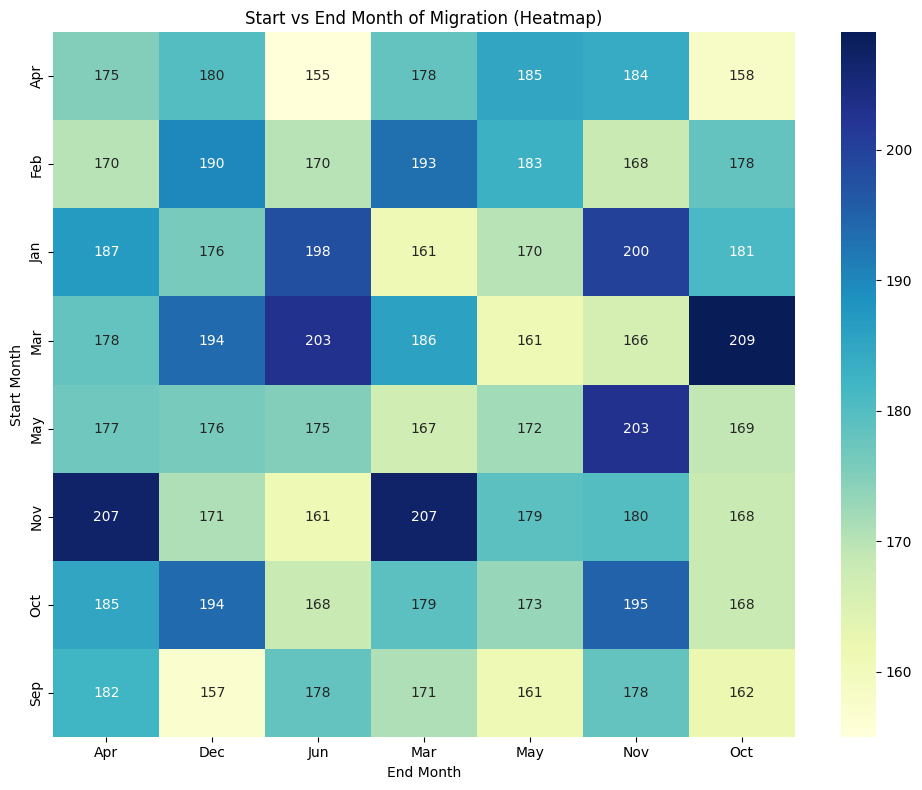

In [ ]:
#check as heatmap
monthly_counts = df.groupby(['Migration_Start_Month', 'Migration_End_Month']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(monthly_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Start vs End Month of Migration (Heatmap)')
plt.xlabel('End Month')
plt.ylabel('Start Month')
plt.tight_layout()
plt.show()

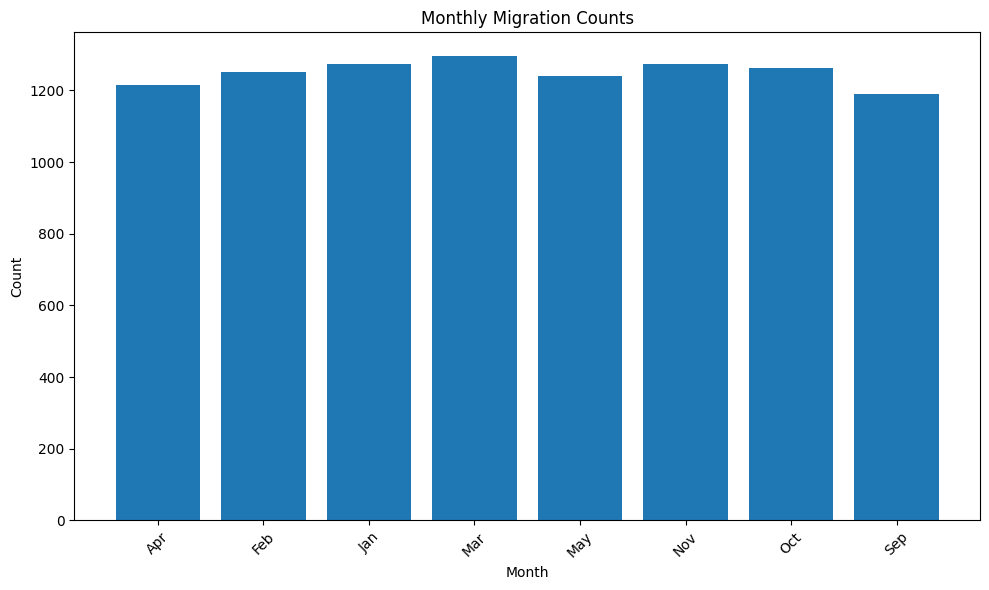

In [ ]:
#check which month high migration in n bar chart
monthly_counts = df['Migration_Start_Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title('Monthly Migration Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph',
       'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success',
       'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month',
       'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type',
       'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level',
       'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason',
       'Tagged_By', 'Tag_Weight_g', 'Migration_Success',
       'Recovery_Location_Known', 'Recovery_Time_days', 'Observation_Counts',
       'Observation_Quality'],
      dtype='object')

In [ ]:
df['Tagged_By'].value_counts()

,count
Tagged_By,
Researcher_B,3348
Researcher_A,3340
Researcher_C,3312


In [40]:
#drop the column unncessary feature that not required
# List of columns to drop
columns_to_drop = [
    'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Tracking_Quality',
    'Observation_Counts', 'Observation_Quality', 'Tagged_By', 'Recovery_Location_Known',
    'Recovery_Time_days','Tag_Type','Tag_Weight_g','Start_Latitude','Start_Longitude','End_Latitude','End_Longitude','Max_Altitude_m','Min_Altitude_m',
    'Migration_Interrupted', 'Interrupted_Reason', 'Nesting_Success',
    'Flock_Size', 'Rest_Stops', 'Predator_Sightings'
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Preview the cleaned dataset
print(df_cleaned.columns)

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph',
       'Temperature_C', 'Wind_Speed_kmph', 'Humidity_%', 'Pressure_hPa',
       'Visibility_km', 'Migration_Start_Month', 'Migration_End_Month',
       'Migrated_in_Flock', 'Food_Supply_Level', 'Migration_Success'],
      dtype='object')


In [41]:
df_cleaned.shape

(10000, 18)

#***Spliting the dataset:-***

In [42]:
#spliting the dataset X,y
X=df_cleaned.drop('Migration_Success',axis=1)
y=df_cleaned['Migration_Success']

In [49]:
cate_col=X.select_dtypes(include='object').columns
cate_col

Index(['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason',
       'Migration_Start_Month', 'Migration_End_Month', 'Migrated_in_Flock',
       'Food_Supply_Level'],
      dtype='object')

#***Label Encoding:-***

In [53]:
#convert the categorical dataset in to numerical column
# Label Encode categorical columns
label_encoders = {}
for col in cate_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoders for later use

In [54]:
#Save the label encoding
with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoders, encoder_file)

In [55]:
y.value_counts()

,count
Migration_Success,
Successful,5094
Failed,4906


In [58]:
#convert the categorical dataset in target column
y.replace({'Successful':1,'Failed':0},inplace=True)

In [59]:
y.value_counts()

,count
Migration_Success,
1,5094
0,4906


In [60]:
#check the dtype
y.dtype

dtype('int64')

In [61]:
X.dtypes

,0
Species,int64
Region,int64
Habitat,int64
Weather_Condition,int64
Migration_Reason,int64
Flight_Distance_km,float64
Flight_Duration_hours,float64
Average_Speed_kmph,float64
Temperature_C,float64
Wind_Speed_kmph,float64


#***Spliting the dataset in to Train and Test:-***

In [62]:
#Split the dataset to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
#Check the shape of dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 17), (2000, 17), (8000,), (2000,))

In [64]:
y_train.head()

,Migration_Success
9254,0
1561,1
1670,0
6087,0
6669,0


In [67]:
X_train.head()

,Species,Region,Habitat,Weather_Condition,Migration_Reason,Flight_Distance_km,Flight_Duration_hours,Average_Speed_kmph,Temperature_C,Wind_Speed_kmph,Humidity_%,Pressure_hPa,Visibility_km,Migration_Start_Month,Migration_End_Month,Migrated_in_Flock,Food_Supply_Level
9254,2,3,3,1,3,3527.42,53.3,56.56,27.0,39.4,35,1032.6,9.9,1,1,0,0
1561,1,1,0,4,0,2286.67,52.4,51.82,26.0,56.6,42,977.2,8.5,4,0,1,1
1670,3,1,5,2,2,2159.63,51.7,45.03,13.9,53.3,72,967.9,7.4,2,0,1,2
6087,5,4,4,4,0,2493.98,48.5,51.12,21.5,50.1,51,1049.8,19.8,6,1,0,2
6669,4,0,5,1,1,2684.26,50.5,58.79,-4.9,43.5,59,962.5,14.3,0,3,1,1


#***Model Building:-***

In [70]:
#use for loop model to train
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(probability=True),
    "NaiveBayes": GaussianNB(),
    "KNeighbors": KNeighborsClassifier()
}

In [71]:
# Train and evaluate
best_model = None
best_accuracy = 0
best_model_name = ""

In [72]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

RandomForest Accuracy: 0.4970
GradientBoosting Accuracy: 0.5130
LogisticRegression Accuracy: 0.4995
DecisionTree Accuracy: 0.4975
SVC Accuracy: 0.5170
NaiveBayes Accuracy: 0.5075
KNeighbors Accuracy: 0.5065


In [73]:
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


✅ Best Model: SVC with Accuracy: 0.5170


#***Save Best Model:-***

In [74]:
# Save best model and encoders
with open("best_migration_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)